Loading required package: arules

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: arulesViz

Loading required package: visNetwork

Loading required package: htmlwidgets



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 638 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 12769 transaction(s)] done [0.00s].
sorting and recoding items ... [15 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 50 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
14 33  3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    3.00    2.78    3.00    4.00 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.05098   Min.   :0.5005   Min.   :0.06171   Min.   :1.035  
 1st Qu.:0.06124   1st Qu.:0.6244   1st Qu.:0.07724   1st Qu.:1.573  
 Median :0.06954   Median :0.7393   Median :0.09684   Median :2.413  
 Mean   :0.10362   Mean   :0.7406   Mean   :0.14801   Mean   :2.172  
 3rd Qu.:0.14048   3rd Qu.:0.8362   3rd Qu.:0.23524   3rd Qu.:2.634  
 Max.   :0.25053   Max.   :0.9943   Max.   :0.36988   Max.   :3.671  
     count     
 Min.   : 651  
 1st Qu.: 782  
 Median : 888  
 Mean   :1323  
 3rd Qu.:1794  
 Max.   :3199  

mining info:
     data ntransactions support confidence
 df_trans         12769    0.05        0.5
                                                                                         

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


png 
  2

Top 15 Rules Sorted by Support:
     lhs                         rhs          support   confidence coverage 
[1]  {Small Rise}             => {Small Gain} 0.2505286 0.9111364  0.2749628
[2]  {Small Gain}             => {Small Rise} 0.2505286 0.6773237  0.3698802
[3]  {Small Drop}             => {Small Loss} 0.2376850 0.9177502  0.2589866
[4]  {Small Loss}             => {Small Drop} 0.2376850 0.6750445  0.3521027
[5]  {Small Gain}             => {Tech}       0.2060459 0.5570612  0.3698802
[6]  {Low}                    => {Tech}       0.1953168 0.7813283  0.2499804
[7]  {Small Loss}             => {Tech}       0.1822382 0.5175712  0.3521027
[8]  {Small Rise}             => {Tech}       0.1672018 0.6080889  0.2749628
[9]  {Small Drop}             => {Tech}       0.1475448 0.5697006  0.2589866
[10] {Small Rise, Small Gain} => {Tech}       0.1468400 0.5861207  0.2505286
[11] {Small Rise, Tech}       => {Small Gain} 0.1468400 0.8782201  0.1672018
[12] {Small Gain, Tech}       => {Small Rise

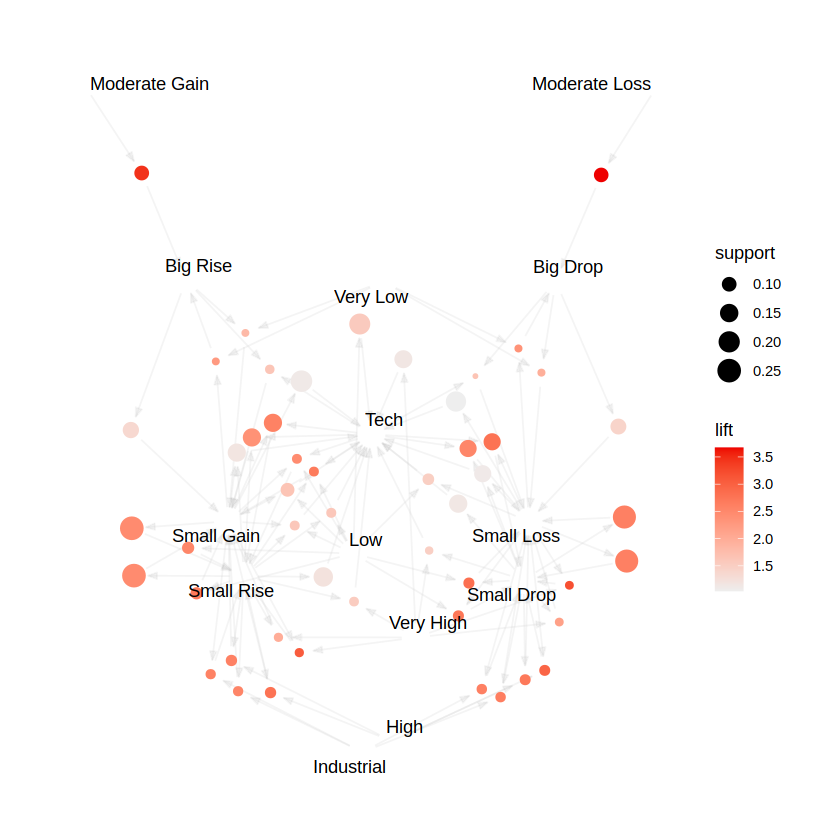

In [1]:
# Install required packages if not already installed
if (!require("arules")) install.packages("arules", repos="http://cloud.r-project.org")
if (!require("arulesViz")) install.packages("arulesViz", repos="http://cloud.r-project.org")
if (!require("visNetwork")) install.packages("visNetwork", repos="http://cloud.r-project.org")
if (!require("htmlwidgets")) install.packages("htmlwidgets", repos="http://cloud.r-project.org")

# Load required libraries
library(arules)
library(arulesViz)
library(visNetwork)
library(htmlwidgets)  # For saving interactive HTML widgets

# Load the dataset without treating the first row as column names (header = FALSE)
data_path <- "ARM_data.csv"  # Update path if needed
df <- read.csv(data_path, header = FALSE, stringsAsFactors = TRUE)

# Remove the first row (which contains aliases/column names as data)
df <- df[-1, ]

# Set the column names from the first row (if necessary) and remove that row
colnames(df) <- as.character(unlist(df[1, ]))
df <- df[-1, ]  # Remove the row with column names

# Convert DataFrame into transactions format
df_trans <- as(df, "transactions")

# Preprocess Dataset: Remove extra text from column names in the transactions (if needed)
# This removes everything before "=" in the column labels
colnames(df_trans) <- gsub(".*=", "", colnames(df_trans))

# Apply Apriori Algorithm with specified parameters
rules <- apriori(df_trans, parameter = list(supp = 0.05, conf = 0.5, minlen = 2, target = "rules"))
summary(rules)

# Visualize all association rules as a graph (static)
plot(rules, method = "graph", control = list(type = "items"))

# Save the static visualization as a PNG file
png("ARM_Network_Cleaned.png")
plot(rules, method = "graph", control = list(type = "items"))
dev.off()

# Extract and inspect the Top 15 rules sorted by different measures

## Top 15 Rules by Support
top15_support <- head(sort(rules, by = "support", decreasing = TRUE), 15)
cat("Top 15 Rules Sorted by Support:\n")
inspect(top15_support)

## Top 15 Rules by Confidence
top15_confidence <- head(sort(rules, by = "confidence", decreasing = TRUE), 15)
cat("\nTop 15 Rules Sorted by Confidence:\n")
inspect(top15_confidence)

## Top 15 Rules by Lift
top15_lift <- head(sort(rules, by = "lift", decreasing = TRUE), 15)
cat("\nTop 15 Rules Sorted by Lift:\n")
inspect(top15_lift)

# Interactive Visualization of the Top 15 Rules by Lift
interactive_plot <- plot(top15_lift, method = "graph", engine = "htmlwidget")
print(interactive_plot)

# Save the interactive visualization as an HTML file
htmlwidgets::saveWidget(interactive_plot, "ARM_Network_Interactive.html", selfcontained = TRUE)
